<a href="https://colab.research.google.com/github/anaisblh/Projet_PDS/blob/main/Projet_Anais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOM PRENOM de tous

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA

import plotly.express as px

In [6]:
# 1. LOADING
def load_data(file_path):
    """
    Input: file_path (str) – path to the CSV file
    Output: df (DataFrame) – loaded dataset
    """
    df = pd.read_csv(file_path)
    return df


# 2. EXPLORATION
def explore_data(df):
    """
    Prints structural information
    and generates basic exploratory visualizations.
    """
    # Structure
    print("Dataset Shape:", df.shape)
    print("\nColumn Types:\n", df.dtypes)

    # Missing values
    print("\nMissing Values per Column:\n", df.isna().sum())

    # Basic statistics (only numeric columns)
    print("\nStatistical Summary:\n", df.describe())

    # Correlation matrix (if numeric data exists)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("\nNot enough numeric columns to compute correlations.")

In this step, we explore the structure of the dataset to understand its content. We examine:

- number of rows and columns,
- data types,
- missing values,
- numerical statistics,
- correlations between variables,
- basic visualizations (heatmap).

This information helps identify potential issues and guides the construction of the indicators in later steps.

In [7]:
# 3. INDICATORS
def indicator_groupby(df):
    """
    Indicator 1A:
        Top 10 emitting countries in 2021.

    Indicator 1B:
        Top 10 countries with the largest increase in emissions (1990–2021).

    Indicator 1C:
        Top 10 lowest emitting countries in 2021.

    Indicator 1D:
        Total global emissions per year (trend from 1990–2021).

    Indicator 1E:
        China's emissions trend (1990–2021).

    Indicator 1F:
        France's emissions trend (1990–2021).

    Indicator 1G:
        Emissions comparison: China, France, US, India, European Union (1990–2021).
    """
   # Indicator 1A:Total by country for 2021
    top_countries = df.groupby("Country")["2021"].sum().sort_values(ascending=False).head(10)
    print("Top 10 emitting countries (2021):")
    print(top_countries)

    plt.figure(figsize=(10,6))
    top_countries.plot(kind="bar", color="orange")
    plt.title("Top 10 Emitting Countries (2021)")
    plt.ylabel("Emissions")
    plt.xlabel("Country")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


    # Indicator 1B: Largest increase 1990-2021
    temp = df[["Country", "1990", "2021"]].copy()
    temp[["1990", "2021"]] = temp[["1990", "2021"]].fillna(0)
    temp["Change_1990_2021"] = temp["2021"] - temp["1990"]

    top_increase = temp.groupby("Country")["Change_1990_2021"].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 countries with the largest increase in emissions (1990–2021):")
    print(top_increase)

    plt.figure(figsize=(10,6))
    top_increase.plot(kind="bar", color="red")
    plt.title("Top 10 Countries – Increase in Emissions (1990–2021)")
    plt.ylabel("Increase in Emissions (2021 – 1990)")
    plt.xlabel("Country")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


    #Indicator 1C: Compute total emissions per country for 2021
    lowest_countries = df.groupby("Country")["2021"].sum().sort_values(ascending=True).head(10)

    print("Top 10 lowest emitting countries (2021):")
    print(lowest_countries)

    # Plot
    plt.figure(figsize=(10,6))
    lowest_countries.plot(kind="bar", color="green")
    plt.title("Top 10 Lowest Emitting Countries (2021)")
    plt.ylabel("Emissions")
    plt.xlabel("Country")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Indicator 1D:Total global emissions per year ---
    years = sorted([col for col in df.columns if col.isdigit()], key=int)

    # Sum emissions for all countries per year
    total_per_year = df[years].sum()

    print("\nTotal global emissions per year (1990–2021):")
    print(total_per_year)

    # Plot
    plt.figure(figsize=(12,6))
    total_per_year.plot(kind="line", marker="o", color="blue")
    plt.title("Total Global Emissions per Year (1990–2021)")
    plt.ylabel("Emissions")
    plt.xlabel("Year")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Indicator 1E : China emissions
    china_data = df[df["Country"] == "China"]
    china_emissions = china_data[years].sum()

    plt.figure(figsize=(12,6))
    china_emissions.plot(kind="line", marker="o", color="red")
    plt.title("China's Emissions (1990–2021)")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Indicator 1F: France emissions
    france_data = df[df["Country"] == "France"]
    france_emissions = france_data[years].sum()

    plt.figure(figsize=(12,6))
    france_emissions.plot(kind="line", marker="o", color="blue")
    plt.title("France's Emissions (1990–2021)")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Indicator 1G: Countries / regions of interest
    china_emissions = df[df["Country"] == "China"][years].sum()
    france_emissions = df[df["Country"] == "France"][years].sum()
    us_emissions = df[df["Country"] == "United States"][years].sum()
    india_emissions = df[df["Country"] == "India"][years].sum()
    eu_emissions = df[df["Country"] == "European Union"][years].sum()

    # Plot comparison
    plt.figure(figsize=(14,7))

    plt.plot(years, china_emissions, marker="o", label="China", color="red")
    plt.plot(years, france_emissions, marker="o", label="France", color="green")
    plt.plot(years, us_emissions, marker="o", label="US", color="orange")
    plt.plot(years, india_emissions, marker="o", label="India", color="purple")
    plt.plot(years, eu_emissions, marker="o", label="European Union", color="brown")

    plt.title("Emissions Comparison: China, France, US, India, European Union (1990–2021)")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def indicator_transformation(df):
    """
    Indicator 2A:
        Standardize country emission time series (1990–2021) using Z-score.

    Indicator 2B:
        K-Means clustering of countries based on standardized emission trends.

    Indicator 2C:
        PCA projection of clusters for visualization in 2D.
    """

    # Prepare the data
    temp = df.copy()
    years = [str(y) for y in range(1990, 2022)]
    country_data = temp.groupby("Country")[years].sum()

    # Indicator 2A: Standardize (Z-score)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(country_data)

    print("Indicator 2A – Standardized emissions (first 5 countries):")
    print(pd.DataFrame(X_scaled, index=country_data.index, columns=years).head())

    # Indicator 2B:K-Means Clustering
    n_clusters = 3  # hardcoded number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    country_data["Cluster"] = clusters
    print(f"\nIndicator 2B – K-Means clustering results (first 10 countries):")
    print(country_data.head(10))

    # Indicator 2C: PCA Projection for visualization
    pca = PCA(n_components=2)
    proj = pca.fit_transform(X_scaled)

    plt.figure(figsize=(12, 7))
    scatter = plt.scatter(proj[:, 0], proj[:, 1], c=clusters, cmap="viridis", s=100)
    for i, country in enumerate(country_data.index):
        plt.text(proj[i, 0]+0.1, proj[i, 1]+0.1, country, fontsize=8)
    plt.title(f"Indicator 2C – K-Means Clustering of Countries (PCA 2D, {n_clusters} clusters)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(scatter, label="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return country_data

- The function indicator_groupby(df) is designed to explore and visualize overall greenhouse gas emission trends. For this, we use only the columns containing the country name and the years from 1990 to 2021 are used, as they are the only variables consistent and comparable across the entire dataset. Other columns (such as Data source, Gas, Sector, Unit) are not used, as they are unique to each row, which prevents any meaningful global aggregation or comparison.

- Indicator 1A is the top 10 emitting countries in 2021. This indicator calculates, for each country, the total sum of its emissions in 2021. We can identifie the 10 countries that emitted the most that year.

- Indicator 1B correpond to the largest increase in emissions (1990–2021).this indicator compares each country's emissions in 1990 and 2021 to measure the total change over this period. It highlights the 10 countries whose emissions increased the most, allowing for the identification of the largest growths.

- Indicator 1C show the lowest emitting countries in 2021. Here, the function identifies the 10 countries with the lowest emissions in 2021 by aggregating the values by country. This highlights the countries that contribute the least to global emissions

- Indicator 1D display the total global emissions per year (1990–2021).this indicator sums up the global emissions for each year between 1990 and 2021. It allows us to visualize the overall evolution of emissions on a global scale. We therefore have a time curve that clearly shows the trends.

- Indicator 1E permite to see China’s emissions trend (1990–2021). it extracts all the rows corresponding to China and sums the annual values to obtain the time series of Chinese emissions over 32 years. The indicator then plots a curve showing the country's emissions evolution year by year. This allows us to observe the dynamics of a major global emitter

- Indicator 1F permite to see France’s emissions trend (1990–2021). same principle as for China: the indicator isolates France’s data, aggregates emissions by year, and then traces their evolution. It allows for analyzing France’s trajectory over the period and identifying phases of increase or reduction.

- Indicator 1G is a comparison between China, France, US, India, and the EU
This indicator selects and aggregates the annual values of five major regions/countries. It then traces the evolution of each one's emissions on the same chart to compare their respective trajectories. This visualization highlights differences in emission levels, dynamics, and transitions among these key actors.

- Indicator 2A is the standardization of time series (Z-score) This indicator transforms each country's emissions to make them comparable to one another. Standardization (Z-score) recenters the data around 0 and scales it to one standard deviation, which explains why values often become negative or close to 0. This step allows for analyzing only the shape of trends (increase, decrease, stability) without being influenced by countries that emit a lot (e.g., China, USA).

- Indicator 2B is the K-Means clustering of countries based on their emission profiles
This indicator applies the K-Means algorithm to group countries into three clusters based on their standardized emission trends. Countries are not grouped by emission intensity, but rather by similarity in trends: rapid growth, stability, or gradual decline. This creates groups of countries that share similar behaviors over the past 30 years

- Indicator 2C permite to visualize clusters via PCA (2D projection)This indicator uses PCA to reduce the 32 years of data to just two dimensions, in order to visualize the clusters on a 2D plane. PCA retains most of the data variance, which allows for an effective representation of the groupings created by K-Means. The final graph shows countries as points colored according to their cluster, making it easier to visually interpret the different emission behaviors.

In [8]:
def indicator_temporal(df):
    """
    Indicator 3 – Temporal analysis:
    3A: ARIMA forecast of global emissions.
    3B: Linear regression trend and forecast.
    3C: Comparison of key countries (by ISO).
    """

    # Build the global time series
    # Keep only real countries: remove "World" and "European Countries"
    df_countries = df[(df["Country"] != "World") &
                      (df["Country"] != "European Countries")]

    # Select year columns
    year_cols = [str(y) for y in range(1990, 2021 + 1)]

    # Sum emissions across these countries for each year
    ts = df_countries[year_cols].sum(axis=0)

    # Index = years (as integers)
    ts.index = ts.index.astype(int)
    ts = ts.sort_index()

    # Fill missing values if there are any
    ts = ts.fillna(method="ffill").fillna(method="bfill")

    print("Global emissions time series (first values):")
    print(ts.head())
    print("\nGlobal emissions time series (last values):")
    print(ts.tail())


    # 3A – ARIMA forecast (next 10 years)
    model = ARIMA(ts, order=(1, 1, 1))  # simple ARIMA model
    results = model.fit()

    forecast_steps = 10
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    last_year = ts.index.max()
    future_years = np.arange(last_year + 1, last_year + 1 + forecast_steps)

    plt.figure(figsize=(10, 6))
    plt.plot(ts.index, ts.values, label="Historical emissions")
    plt.plot(future_years, forecast_mean.values,
             label="ARIMA forecast", linestyle="--")

    plt.fill_between(
        future_years,
        forecast_ci.iloc[:, 0],
        forecast_ci.iloc[:, 1],
        alpha=0.2,
        label="95% confidence interval"
    )

    plt.title("Indicator 3 – ARIMA Forecast of Global Emissions")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.legend()
    plt.tight_layout()
    plt.show()


    # 3B – Linear regression trend + prediction
    X = ts.index.values.reshape(-1, 1)   # years
    y = ts.values                        # emissions

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    years_full = np.arange(1990, 2031)
    y_pred = lin_reg.predict(years_full.reshape(-1, 1))

    plt.figure(figsize=(10, 6))
    plt.scatter(ts.index, ts.values,
                label="Historical emissions", s=30)
    plt.plot(years_full, y_pred,
             label="Linear regression trend", linestyle="-")

    future_mask = years_full > last_year
    plt.plot(years_full[future_mask], y_pred[future_mask],
             label="Predicted (beyond historical data)", linestyle="--")

    plt.title("Indicator 3 – Linear Trend and Forecast of Global Emissions")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3C – Comparison of key countries (by ISO)
    # Clean ISO column
    df = df.copy()
    df["ISO"] = df["ISO"].str.strip()
    iso_list = ["CHN", "USA", "IND", "FRA"]

    # Year columns (adapt if your range is different)
    years = [str(y) for y in range(1990, 2021 + 1)]

    plt.figure(figsize=(10, 6))

    for iso in iso_list:
        country_df = df[df["ISO"] == iso]

        if country_df.empty:
            print(f"Warning: ISO code '{iso}' not found in the dataset.")
            continue

        # Take the first row for that ISO
        ts = country_df[years].iloc[0].values
        country_name = country_df["Country"].iloc[0]

        plt.plot(years, ts, marker="o", label=country_name)

    plt.title("Indicator 3 – Comparison of Emissions for Selected Countries")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    pass

#### **Indicator 3A — ARIMA Forecast of Global Emissions**

In this indicator, we construct a global time series by summing emissions from all individual countries (excluding aggregate entries such as "World" or "European Countries").
We then apply an ARIMA (1,1,1) model to the historical emissions from 1990 to 2021 to forecast the next ten years.

The resulting plot includes:

* the historical emissions curve,
* the ARIMA forecast (dashed line),
* a 95% confidence interval.

This indicator provides a data-driven projection of global emissions if past long-term dynamics continue. It also illustrates the uncertainty inherent in forecasting environmental variables over time.

#### **Indicator 3B — Linear Trend and Forecast of Global Emissions**

In parallel with ARIMA, we fit a simple linear regression model to the same global emission time series.
This model captures the long-term linear trend between emissions and time and is then used to predict emissions up to 2030.

The plot shows:

* historical emissions (scatter points),
* the fitted linear trend line,
* future predicted emissions (dashed line).

This indicator offers a simplified but intuitive forecast of emissions. Comparing it with the ARIMA forecast helps illustrate differences between linear and statistical time-series models.


#### **Indicator 3C — Comparison of Emission Trends for Selected Countries**

To complement the global analysis, we compare the emission trajectories of several major countries over the same period (1990–2021).
For each selected ISO code, we extract the country’s time series and plot them together on a single graph.

This comparison reveals meaningful differences between countries:

* some exhibit fast-growing emissions,
* others show moderate growth or stabilization,
* a few display declining emissions over time.

This indicator provides important context by showing how national trajectories differ from the global trend and from one another.

In [9]:
def indicator_spatial(df):
    """
    Indicator 4 – Spatial analysis.

    4A: Share of global emissions (%) by country in 2021.
    4B: Emission Trend Slopebetween 1990 and 2021 by country.
    """

    # Common: clean and keep real countries only
    df_countries = df.copy()
    df_countries["ISO"] = df_countries["ISO"].str.strip()
    df_countries["Country"] = df_countries["Country"].str.strip()

    # Remove aggregate rows that are not individual countries
    df_countries = df_countries[
        (df_countries["Country"] != "World") &
        (df_countries["Country"] != "European Countries")
    ]

    # 4A – Share of global emissions (%) in 2021
    emissions_2021 = (
        df_countries.groupby(["ISO", "Country"])["2021"]
        .sum()
        .reset_index()
    )

    total_2021 = emissions_2021["2021"].sum()
    emissions_2021["Share_2021"] = emissions_2021["2021"] / total_2021 * 100

    fig_share = px.choropleth(
        emissions_2021,
        locations="ISO",
        color="Share_2021",
        hover_name="Country",
        hover_data={"2021": True, "Share_2021": ":.2f"},
        color_continuous_scale="Reds",
        labels={"Share_2021": "Share of global emissions (%)"},
        title="Indicator 4A – Share of Global Emissions by Country (2021)"
    )
    fig_share.show()

    # 4B – Trend Slope of Emissions (1990–2021)
    # Compute slope for each country
    slopes = []
    df_temp = df.copy()
    df_temp["ISO"] = df_temp["ISO"].str.strip()
    df_temp["Country"] = df_temp["Country"].str.strip()

    # Remove aggregate rows
    df_temp = df_temp[
        (df_temp["Country"] != "World") &
        (df_temp["Country"] != "European Countries")
    ]

    years = [str(y) for y in range(1990, 2021 + 1)]
    X = np.array([int(y) for y in years]).reshape(-1, 1)

    for iso, g in df_temp.groupby("ISO"):
        y_vals = g[years].sum().values

        if np.all(np.isnan(y_vals)):
            continue

        y_vals = np.nan_to_num(y_vals)

        model = LinearRegression().fit(X, y_vals)
        slope = model.coef_[0]

        slopes.append({
            "ISO": iso,
            "Country": g["Country"].iloc[0],
            "Slope": slope
        })

    slopes_df = pd.DataFrame(slopes)
    # Clip extreme slopes to avoid China/India dominating visually
    slopes_df["Slope_clipped"] = slopes_df["Slope"].clip(
        lower=slopes_df["Slope"].quantile(0.05),
        upper=slopes_df["Slope"].quantile(0.95)
    )

    fig_slope = px.choropleth(
        slopes_df,
        locations="ISO",
        color="Slope_clipped",
        hover_name="Country",
        hover_data={"Slope": ":.2f"},
        # Much stronger contrast
        color_continuous_scale=[
            (0.00, "#2B1F5C"),
            (0.25, "#4B74C8"),
            (0.50, "#E8E8E8"),
            (0.75, "#F97B22"),
            (1.00, "#7A0403")
        ],
        color_continuous_midpoint=0,
        labels={"Slope_clipped": "Trend slope (1990–2021)"},
        title="Indicator 4 – Emission Trend Slope by Country (1990–2021)"
    )

    fig_slope.update_layout(
        coloraxis_colorbar=dict(
            title="Slope",
            tickformat=".2f"
        )
    )

    fig_slope.show()
    pass

#### **Indicator 4A – Share of global emissions by country (2021)**

Instead of plotting raw emissions, we compute for each country its **share of global emissions in 2021**.
We first aggregate emissions per country and then divide by the world total to obtain a percentage.
The choropleth map highlights:

* a small number of countries concentrating a very large share of global emissions,
* many countries with a very small contribution in absolute terms.

This indicator is more informative than raw values, as it directly answers the question:
**“Which countries contribute the most to global emissions?”**


#### **Indicator 4B — Emission Trend Slope (1990–2021)**

For each country, we compute a linear regression of annual greenhouse gas emissions from 1990 to 2021.

**Formula** : Emissions = *a* x Year + *b*

**Interpretation of the slope (the coefficient "a"):**

* **Slope > 0** → emissions are increasing
* **Slope < 0** → emissions are decreasing
* **Slope ≈ 0** → emissions are relatively stable

This indicator highlights long-term emission dynamics at the country level.
It reveals three important patterns:

1. **Fast-growing emitters** (large positive slopes), often rapidly industrializing economies
2. **Stabilizing or slowly increasing countries**
3. **Countries with declining emissions** (negative slopes), usually due to climate policies or economic restructuring

This spatial visualization complements the global ARIMA and linear regression indicators by showing **where** emission trajectories are rising or falling across the world.

In [10]:
# 4. DASHBOARD
def create_dashboard():
    """
    Creates and launches the Dash dashboard.
    """
    pass

Top 10 emitting countries (2021):
Country
World                  49553.48
China                  12791.58
United States           5564.83
India                   3419.89
European Union (27)     3140.23
Russia                  1975.57
Brazil                  1531.51
Indonesia               1484.66
Japan                   1071.59
Iran                     952.23
Name: 2021, dtype: float64


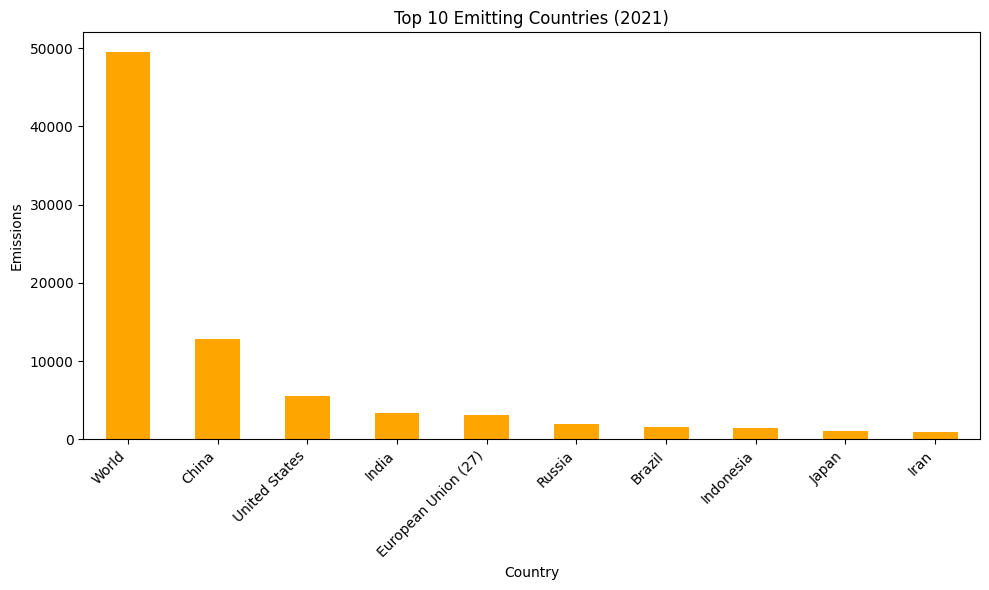


Top 10 countries with the largest increase in emissions (1990–2021):
Country
World           16818.46
China            9925.48
India            2394.26
Iran              650.19
Saudi Arabia      491.75
Vietnam           455.77
South Korea       381.22
Indonesia         350.76
Türkiye           325.16
Pakistan          319.78
Name: Change_1990_2021, dtype: float64


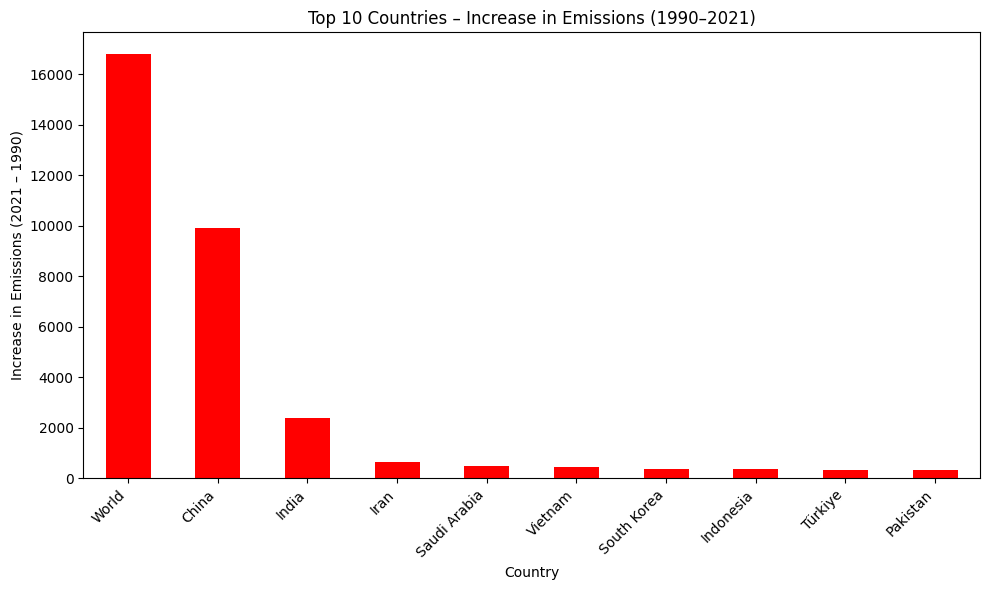

Top 10 lowest emitting countries (2021):
Country
Fiji               -0.84
Niue                0.01
Tuvalu              0.02
Nauru               0.06
Cook Islands        0.08
Kiribati            0.11
Liechtenstein       0.16
Micronesia          0.21
Marshall Islands    0.21
Dominica            0.22
Name: 2021, dtype: float64


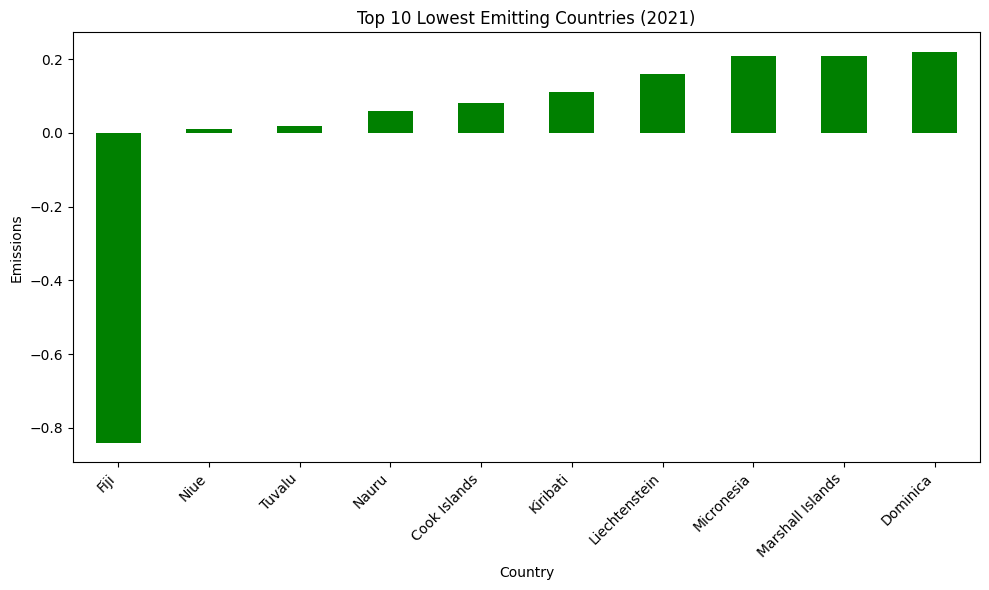


Total global emissions per year (1990–2021):
1990     68572.13
1991     68808.09
1992     68566.93
1993     68779.11
1994     69287.15
1995     70886.94
1996     71770.54
1997     74385.58
1998     73395.93
1999     73272.07
2000     74690.49
2001     74889.98
2002     76722.97
2003     78767.83
2004     82345.09
2005     84135.04
2006     87022.39
2007     88504.94
2008     88908.34
2009     88647.94
2010     92263.86
2011     92221.78
2012     93254.70
2013     94466.15
2014     95565.46
2015     95434.00
2016     97071.92
2017     98394.39
2018    100572.90
2019    101167.94
2020     96537.27
2021    100838.91
dtype: float64


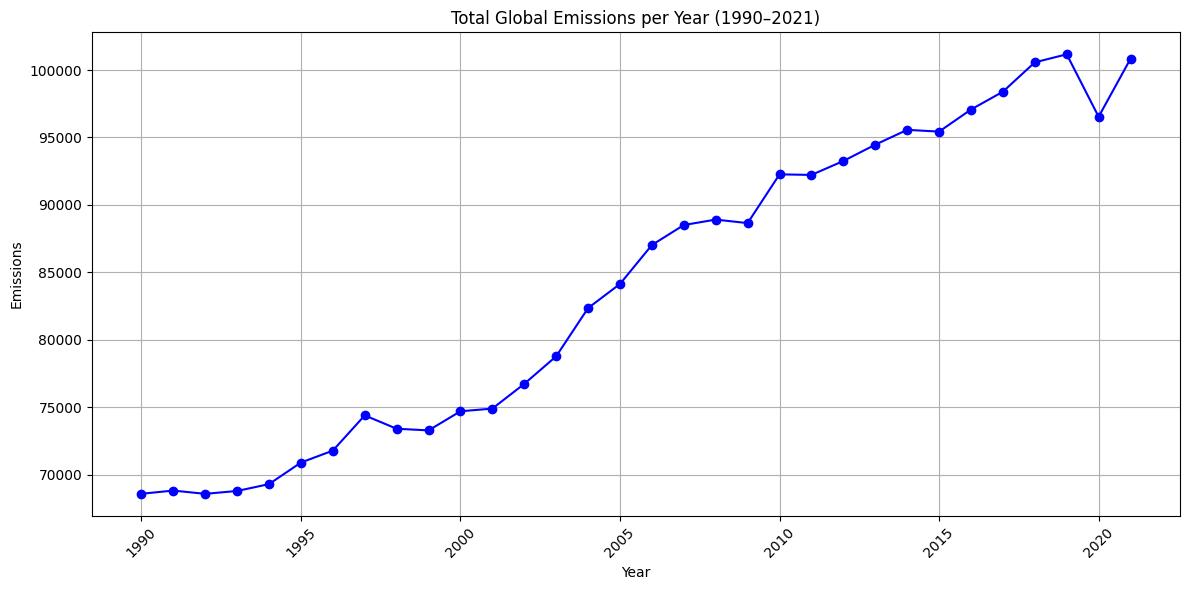

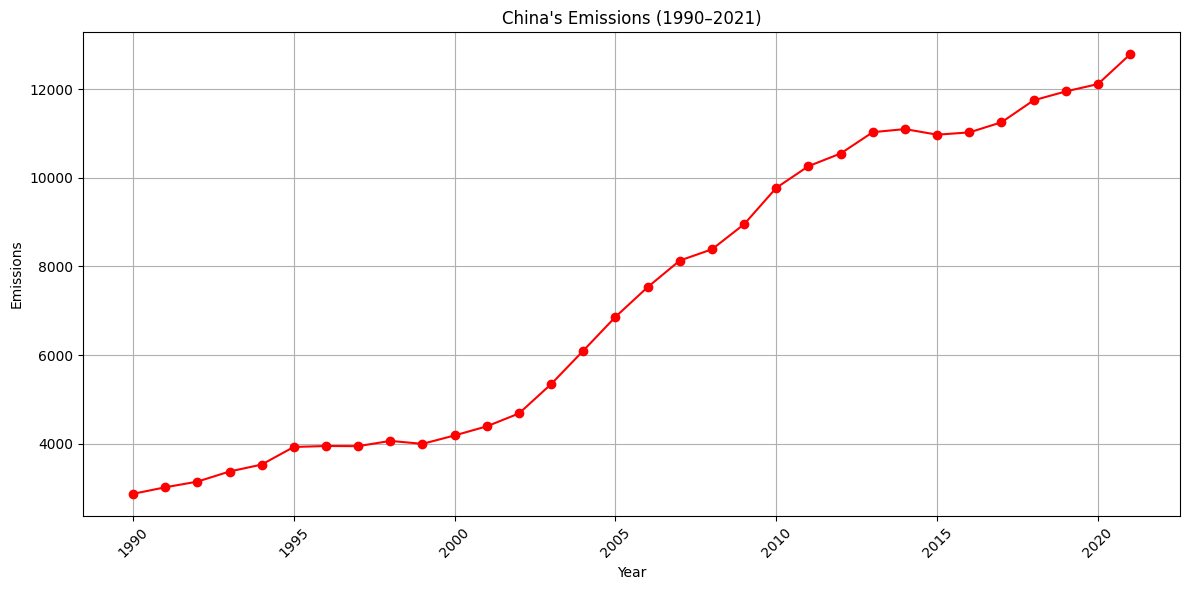

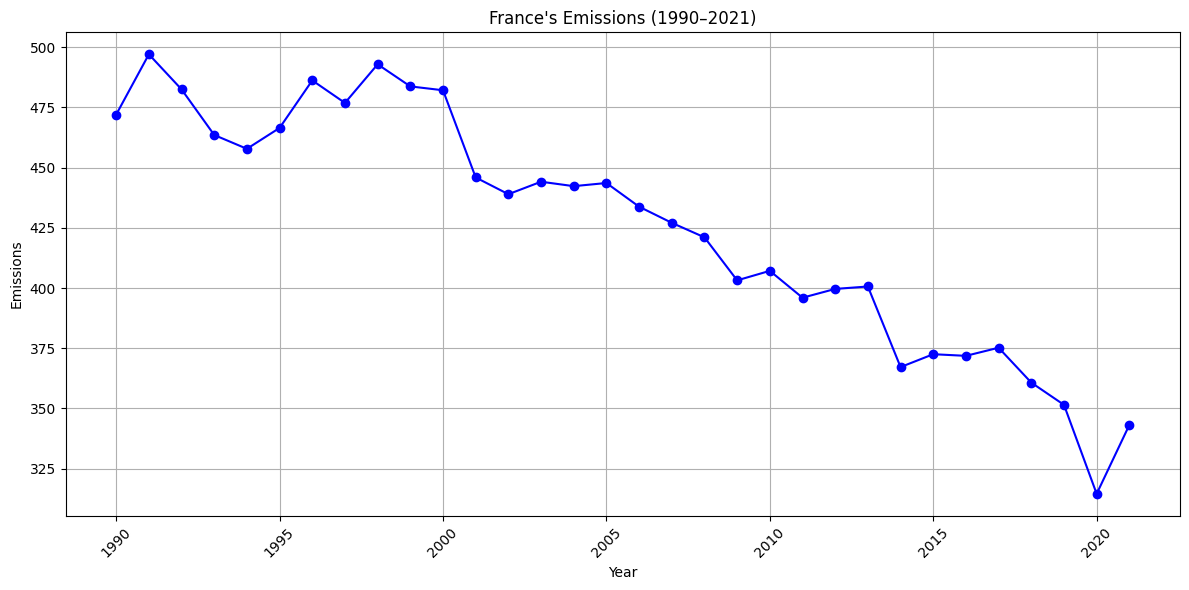

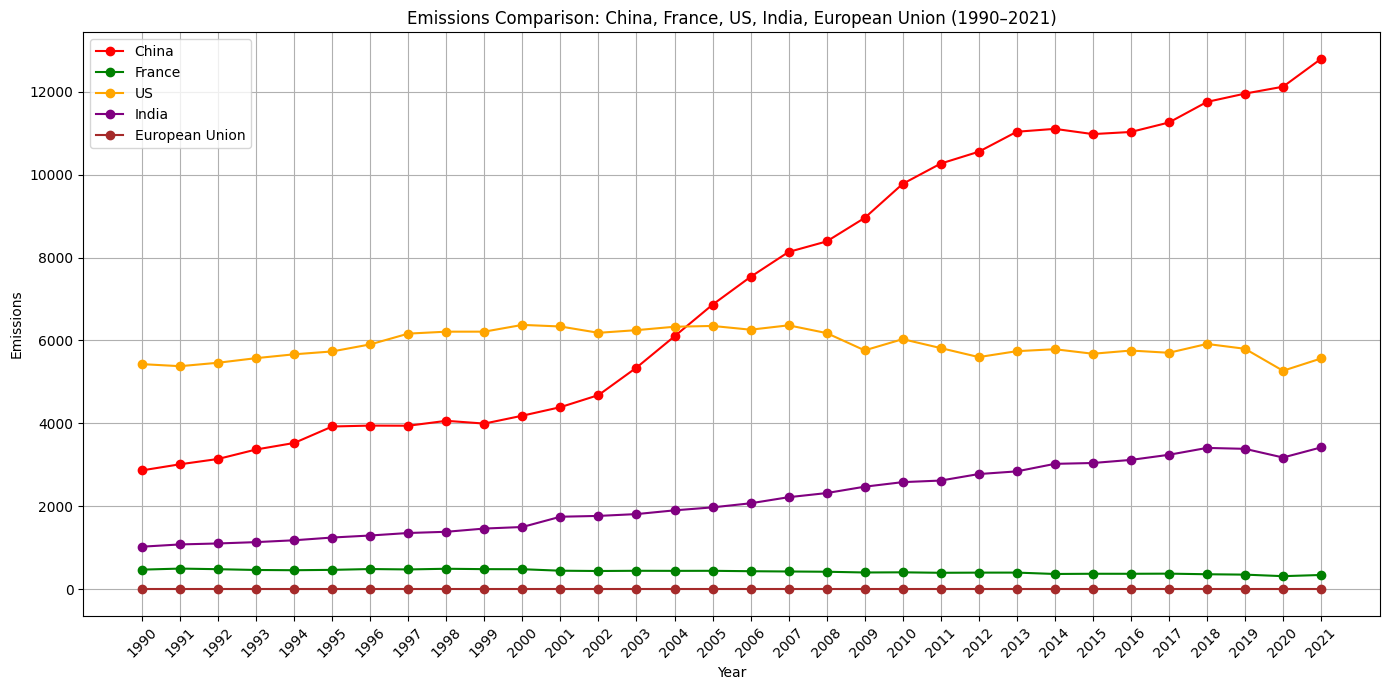

/tmp/ipython-input-218799559.py:25: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.p

Global emissions time series (first values):
1990    35837.11
1991    35927.29
1992    35779.41
1993    35855.08
1994    36095.38
dtype: float64

Global emissions time series (last values):
2017    50053.10
2018    51090.80
2019    51324.37
2020    49074.10
2021    51285.43
dtype: float64


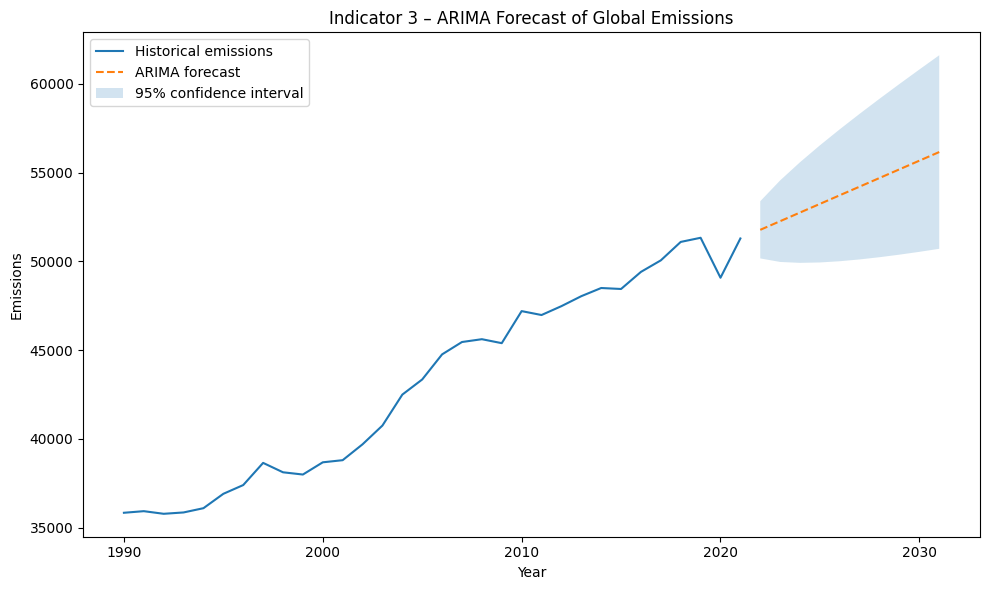

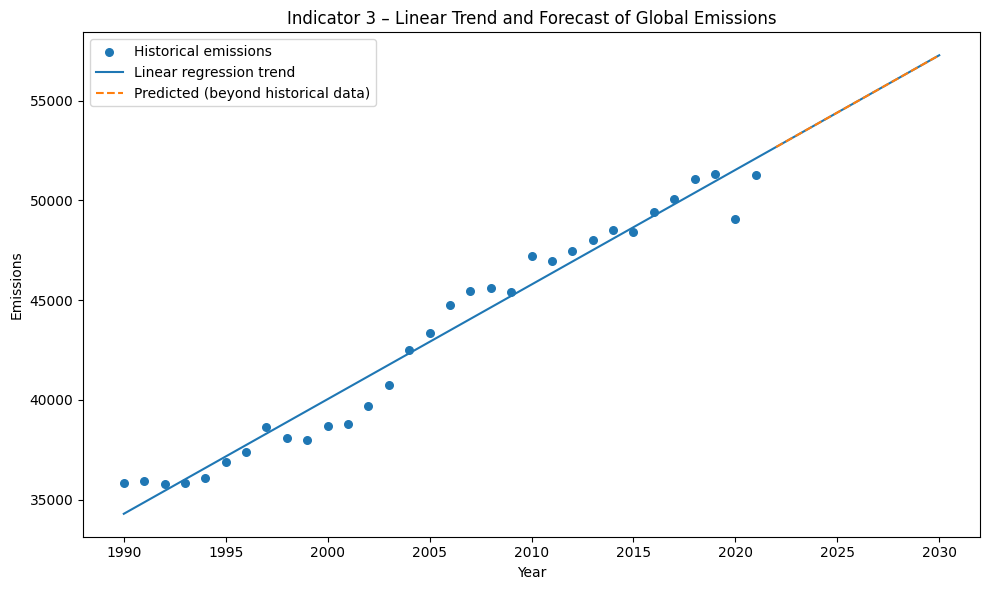

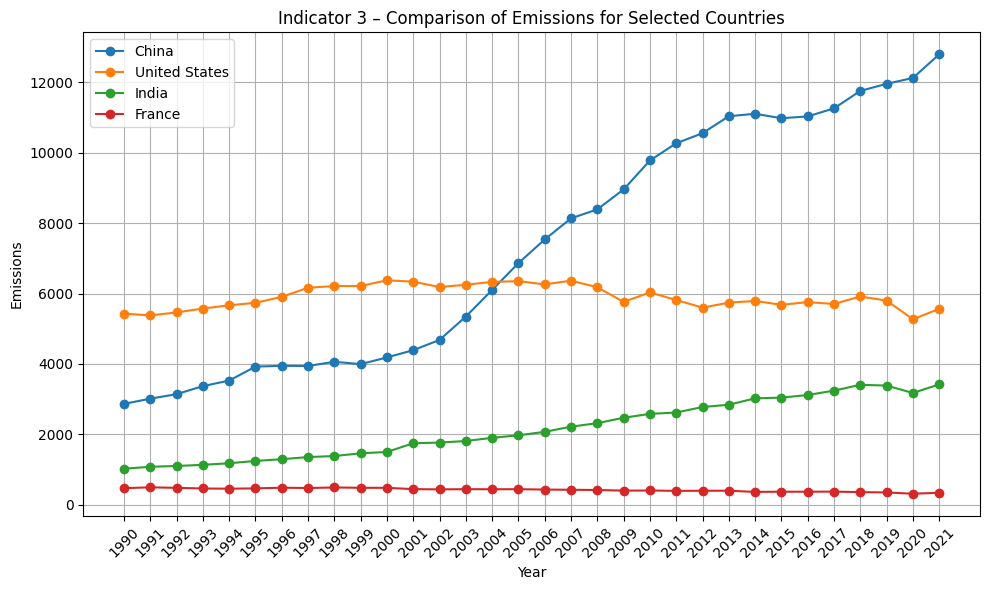

In [13]:
# 5. MAIN FUNCTION
def main():
    file_path = "historical_emissions.csv"

    # Step 1: Load the data
    df = load_data(file_path)

    # Step 2: Explore the data
    # explore_data(df)

    # Step 3: Build the indicators
    indicator_groupby(df)
    # indicator_transformation(df)
    indicator_temporal(df)
    indicator_spatial(df)

    # Step 4: Launch the dashboard
    create_dashboard()


if __name__ == "__main__":
    main()